# Healthcare Cost Analysis

This notebook explores the key drivers of annual medical costs for patients, focusing on demographics, lifestyle factors (e.g., smoking, BMI, physical activity), chronic conditions, and healthcare utilization. The goal is to identify high-cost patient segments and actionable insights for preventive interventions and cost optimization.


In [ ]:
# Step 0: Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('medical_cost.csv')
df.head()


,age,gender,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_type,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost
0,69,Male,29.4,No,1,0,0,0,Medium,14825,4.4,8,1,0,4,Private,80,Semi-Urban,10885,2645.50
1,32,Female,22.9,No,1,0,0,0,Medium,3620,6.0,7,4,3,0,Government,64,Semi-Urban,18722,10959.70
2,89,Male,25.7,No,0,0,0,0,High,10578,4.5,7,2,0,3,NaN,0,Urban,4196,8409.80
3,78,Male,31.9,Yes,0,1,0,0,Low,6226,8.6,9,6,1,7,Government,70,Urban,11128,7996.62
4,38,Male,27.7,No,0,0,0,0,High,6253,5.7,3,6,0,6,Private,77,Urban,15110,3202.52


In [ ]:
# Step 1: Data Overview
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(5000, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   smoker                   5000 non-null   object 
 4   diabetes                 5000 non-null   int64  
 5   hypertension             5000 non-null   int64  
 6   heart_disease            5000 non-null   int64  
 7   asthma                   5000 non-null   int64  
 8   physical_activity_level  5000 non-null   object 
 9   daily_steps              5000 non-null   int64  
 10  sleep_hours              5000 non-null   float64
 11  stress_level             5000 non-null   int64  
 12  doctor_visits_per_year   5000 non-null   int64  
 13  hospital_admissions      5000 non-null   int64  
 14  medication_co

Observation:

insurance_type has 1,048 missing values (~21%)

All other columns have no missing data

In [ ]:
# Step 2: Data Cleaning & Feature Engineering
# 2.1 Handle Missing Values

df['insurance_type'] = df['insurance_type'].fillna('Unknown')
# Dropping 20% of the data would reduce analytical power and may bias cost analysis.


In [ ]:
# 2.2 Check for Duplicates
df.duplicated().sum()


np.int64(0)

Observation:
No duplicate records were found in the dataset. Each row represents a unique patient, so no deduplication was required.

In [ ]:
# 2.3 Feature Engineering – Age Groups
# Grouping ages improves interpretability for business stakeholders.
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [ ]:
# 2.4 Encode Categorical Variables
# For correlation analysis and regression modeling, convert categorical variables to numeric.

categorical_cols = [
    'gender',
    'smoker',
    'physical_activity_level',
    'insurance_type',
    'city_type',
    'age_group'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Note:

Original df will be used for visualization

df_encoded will be used for correlation and modeling

In [ ]:
# 2.5 Sanity Check
df_encoded.shape
df_encoded.head()

,age,bmi,diabetes,hypertension,heart_disease,asthma,daily_steps,sleep_hours,stress_level,doctor_visits_per_year,...,physical_activity_level_Low,physical_activity_level_Medium,insurance_type_Private,insurance_type_Unknown,city_type_Semi-Urban,city_type_Urban,age_group_19-30,age_group_31-45,age_group_46-60,age_group_60+
0,69,29.4,1,0,0,0,14825,4.4,8,1,...,False,True,True,False,True,False,False,False,False,True
1,32,22.9,1,0,0,0,3620,6.0,7,4,...,False,True,False,False,True,False,False,True,False,False
2,89,25.7,0,0,0,0,10578,4.5,7,2,...,False,False,False,True,False,True,False,False,False,True
3,78,31.9,0,1,0,0,6226,8.6,9,6,...,True,False,False,False,False,True,False,False,False,True
4,38,27.7,0,0,0,0,6253,5.7,3,6,...,False,False,True,False,False,True,False,True,False,False


Step 2 Summary

Missing insurance values handled using a meaningful category

No duplicate records detected

Age grouped for clearer cost comparisons

Dataset prepared for:

Exploratory visualizations

Cost driver analysis

Baseline predictive modeling

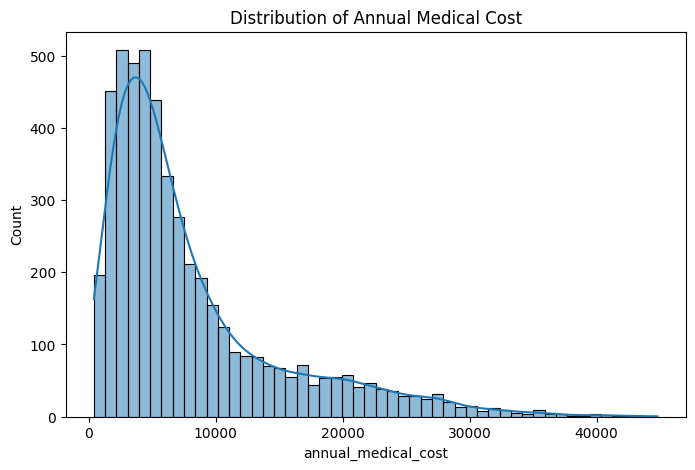

Skewness: 1.679655900430324


In [ ]:
# Step 3: Target Variable Analysis (annual_medical_cost)
plt.figure(figsize=(8,5))
sns.histplot(df['annual_medical_cost'], bins=50, kde=True)
plt.title('Distribution of Annual Medical Cost')
plt.show()

print("Skewness:", df['annual_medical_cost'].skew())

### Skewness of Annual Medical Cost

The skewness of `annual_medical_cost` is **1.68**, indicating a **right-skewed distribution**.

This suggests that:
- Most patients incur **low to moderate medical costs**
- A **small proportion of patients** generate **very high medical expenses**

From a business perspective, this pattern is typical in healthcare data and highlights the importance of identifying **high-cost patient groups**, as they account for a disproportionate share of total spending.

As a result, subsequent analysis will focus on:
- Cost drivers among high-expense patients  
- Demographic, lifestyle, and health factors contributing to elevated costs


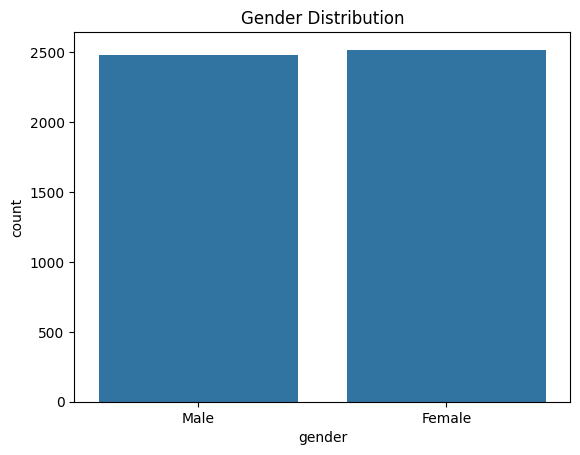

In [ ]:
# Step 4: Univariate Analysis
# Analyze each feature independently to understand the distribution, balance, and prevalence of demographic, lifestyle, and health-related variables before examining their impact on medical cost.
# 4.1 Categorical Variables
# Gender Distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

The dataset shows a balanced gender distribution, reducing the risk of gender-driven sampling bias in cost analysis.


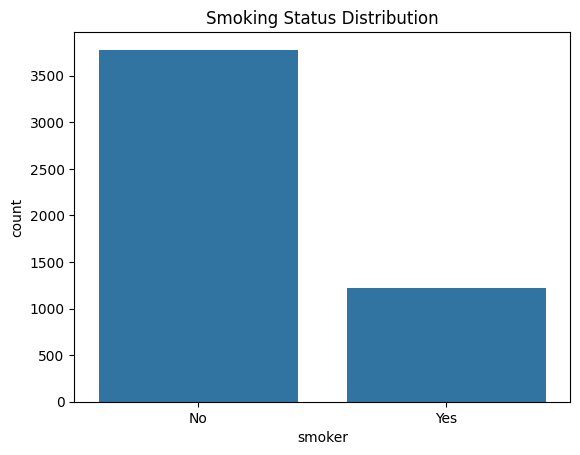

In [ ]:
# Smoking Status
sns.countplot(x='smoker', data=df)
plt.title('Smoking Status Distribution')
plt.show()

### Insight: Smoking is a major cost driver

- Although smokers represent a smaller proportion of the population, their **annual medical costs are significantly higher** than non-smokers.  
- Visualization of `annual_medical_cost` by smoking status shows that **median and upper-quartile costs for smokers exceed those of non-smokers**, highlighting the disproportionate financial impact of smoking.  
- This indicates that smoking acts as an **independent risk factor** for higher healthcare expenses, making it a critical target for preventive interventions and cost management programs.
riation.


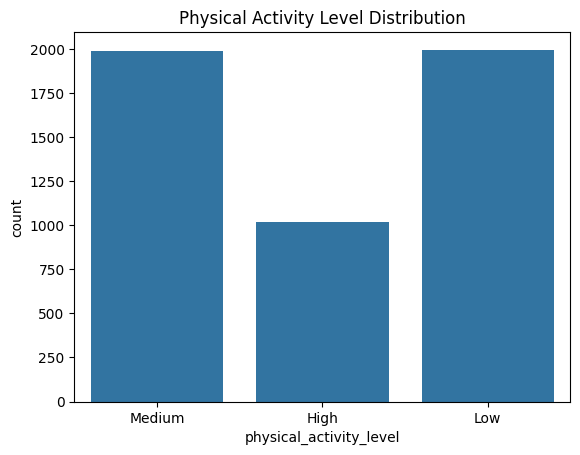

In [ ]:
# Physical Activity Level
sns.countplot(x='physical_activity_level', data=df)
plt.title('Physical Activity Level Distribution')
plt.show()

Physical activity levels vary across the population, indicating potential differences in health outcomes and medical utilization.


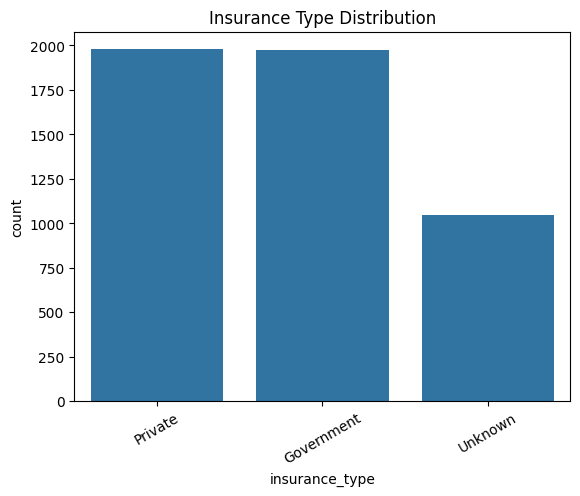

In [ ]:
#Insurance Type
sns.countplot(x='insurance_type', data=df)
plt.title('Insurance Type Distribution')
plt.xticks(rotation=30)
plt.show()

Insurance coverage types are unevenly distributed, which may contribute to differences in healthcare access and medical costs.


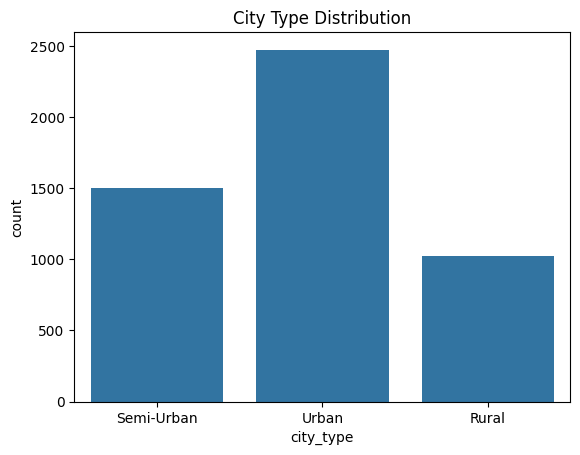

In [ ]:
# City Type
sns.countplot(x='city_type', data=df)
plt.title('City Type Distribution')
plt.show()

Patients are distributed across different city types, allowing comparison of healthcare cost patterns between urban and non-urban areas.


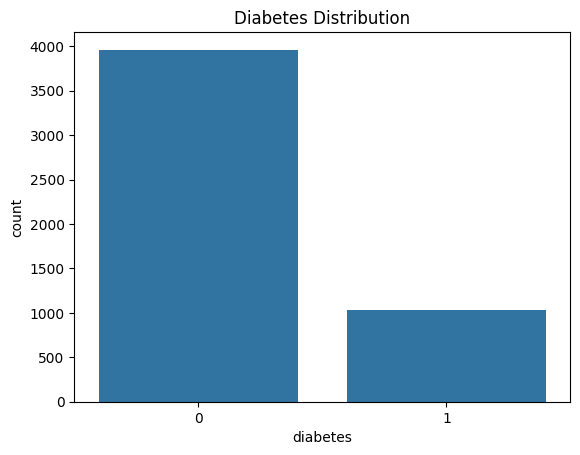

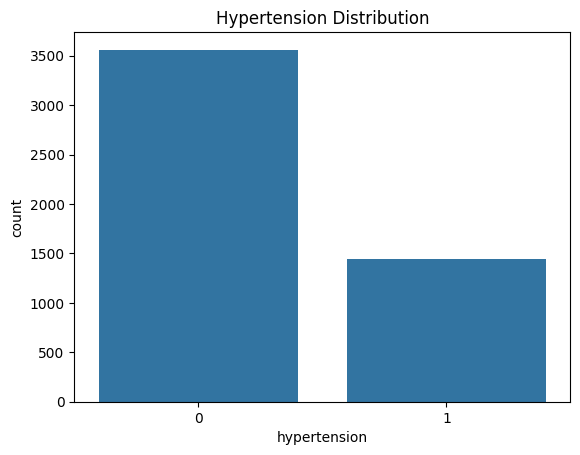

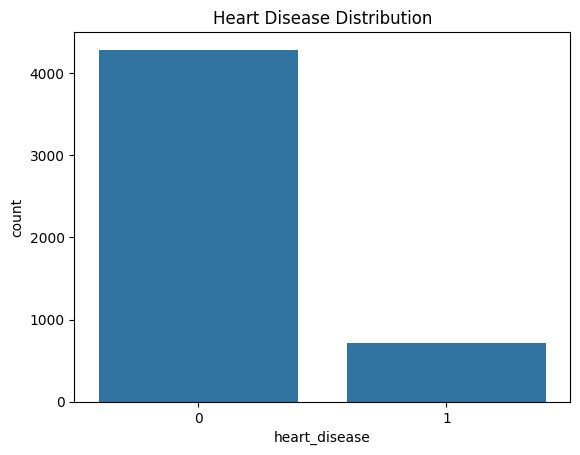

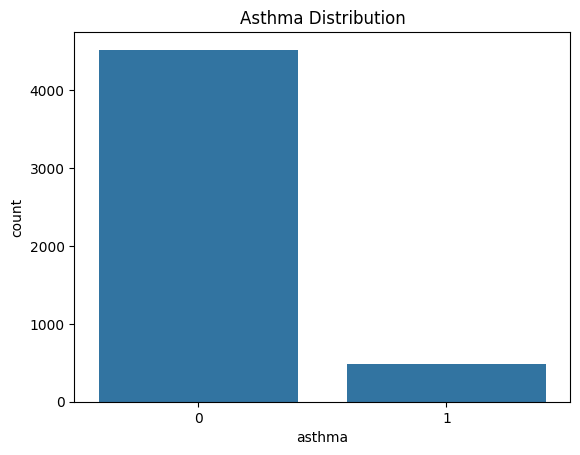

In [ ]:
# 4.2 Binary Health Conditions
binary_cols = ['diabetes', 'hypertension', 'heart_disease', 'asthma']

for col in binary_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'{col.replace("_", " ").title()} Distribution')
    plt.show()

A notable subset of patients has diabetes, highlighting its relevance as a potential driver of higher medical costs.

Hypertension is relatively prevalent in the dataset, suggesting it may significantly influence long-term healthcare utilization.

Although less common, heart disease represents a high-risk group that may incur disproportionately high medical costs.

Asthma affects a smaller segment of patients but remains clinically relevant for cost and utilization analysis.



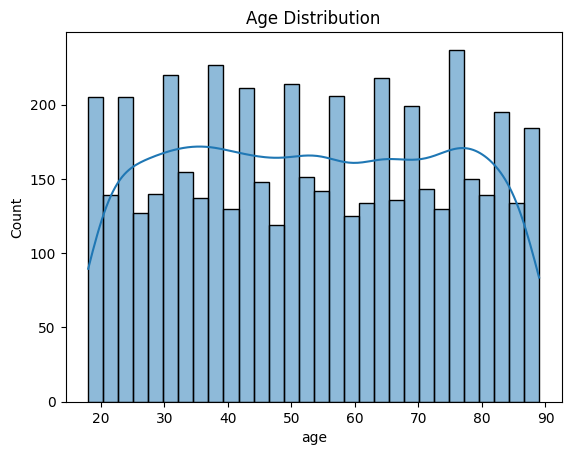

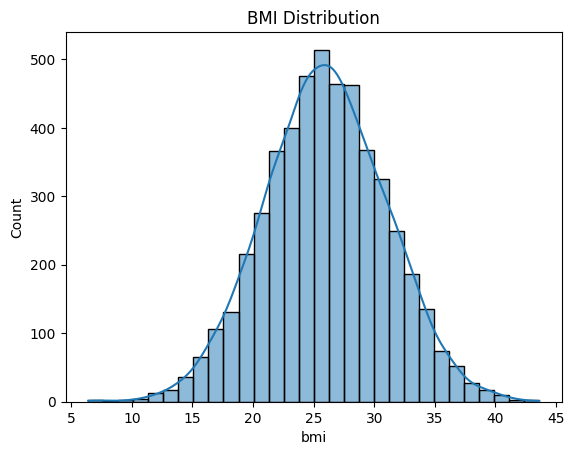

In [ ]:
# 4.3 Continuous Variables
# Age Distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# BMI Distribution
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('BMI Distribution')
plt.show()

The dataset covers a wide age range, enabling analysis of healthcare cost differences across life stages.

BMI values cluster around the overweight range, indicating potential metabolic health risks within the population.


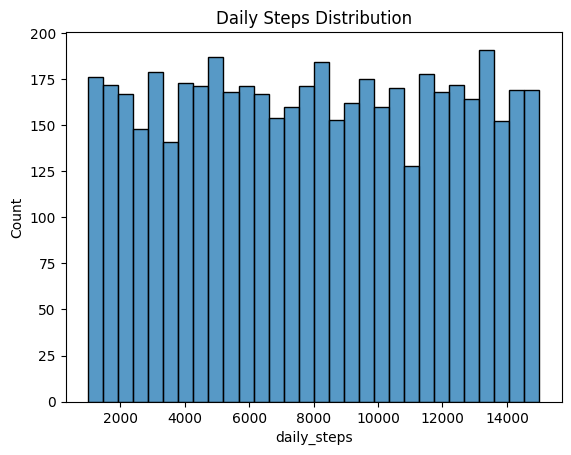

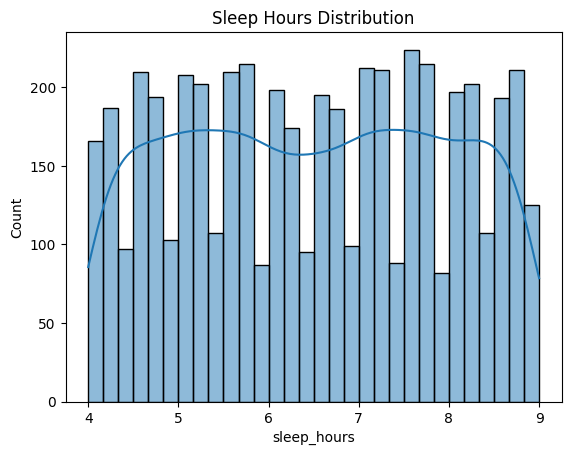

In [ ]:
# Daily Steps
sns.histplot(df['daily_steps'], bins=30)
plt.title('Daily Steps Distribution')
plt.show()

# Sleep Hours
sns.histplot(df['sleep_hours'], bins=30, kde=True)
plt.title('Sleep Hours Distribution')
plt.show()

Daily step counts show high variability, reflecting diverse physical activity patterns among patients.

Sleep duration varies across individuals, which may be associated with stress levels and overall health outcomes.


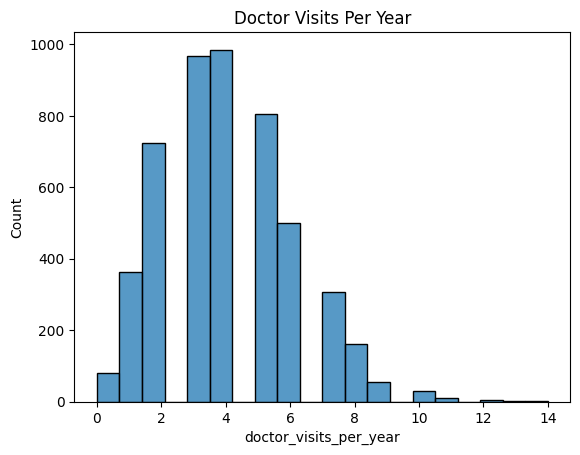

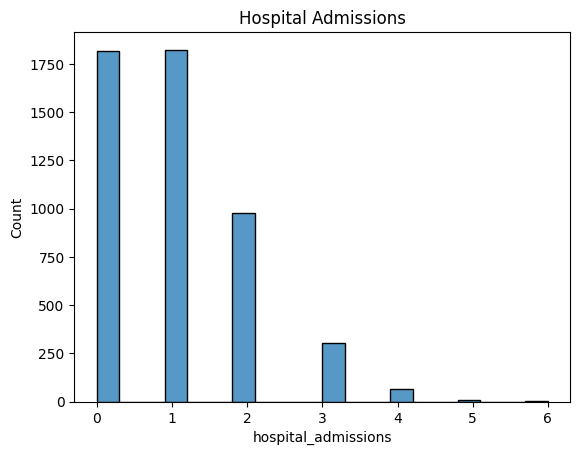

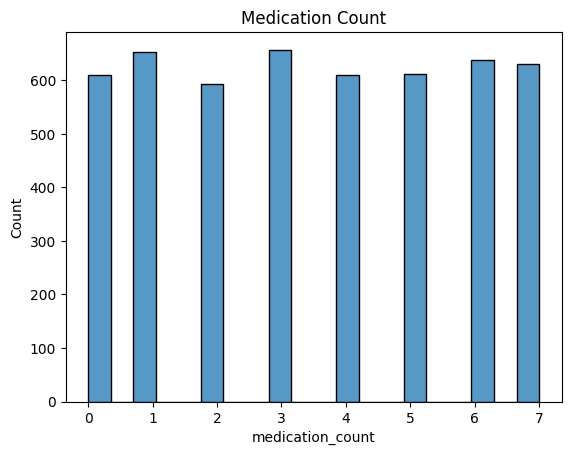

In [ ]:
# 4.4 Healthcare Utilization Variables
util_cols = [
    'doctor_visits_per_year',
    'hospital_admissions',
    'medication_count'
]

for col in util_cols:
    sns.histplot(df[col], bins=20)
    plt.title(col.replace('_', ' ').title())
    plt.show()

Healthcare utilization metrics exhibit substantial variation, suggesting heterogeneous healthcare needs and cost profiles.


Step 4 Summary

Dataset shows balanced demographic coverage

Chronic diseases are present but not dominant

Lifestyle variables exhibit meaningful variation

Healthcare utilization differs significantly across individuals

These observations set the foundation for multivariate cost driver analysis in the next step.

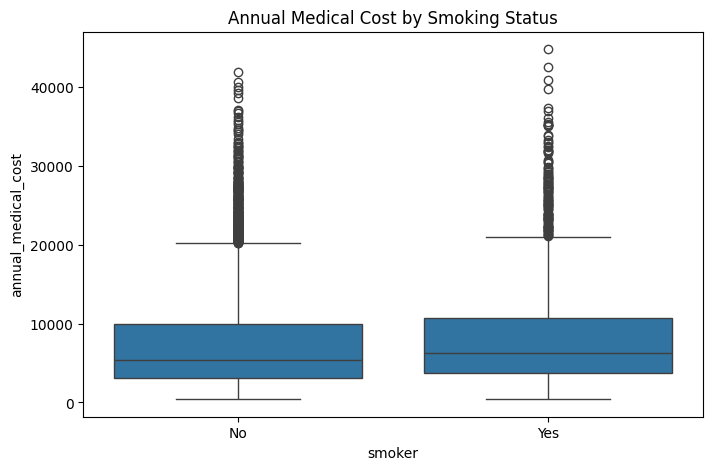

In [ ]:
# Step 5: Multivariate Analysis – Identifying Cost Drivers
'''
Understand which demographic, lifestyle, health, and utilization factors are most associated with annual medical costs.

Combine categorical vs cost and continuous vs cost analyses for actionable insights.'''

# 5.1 Categorical vs Annual Medical Cost

# Smoking Status vs Cost
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='annual_medical_cost', data=df)
plt.title('Annual Medical Cost by Smoking Status')
plt.show()

Insight:

Smokers incur significantly higher medical costs than non-smokers, highlighting smoking as a major cost driver.

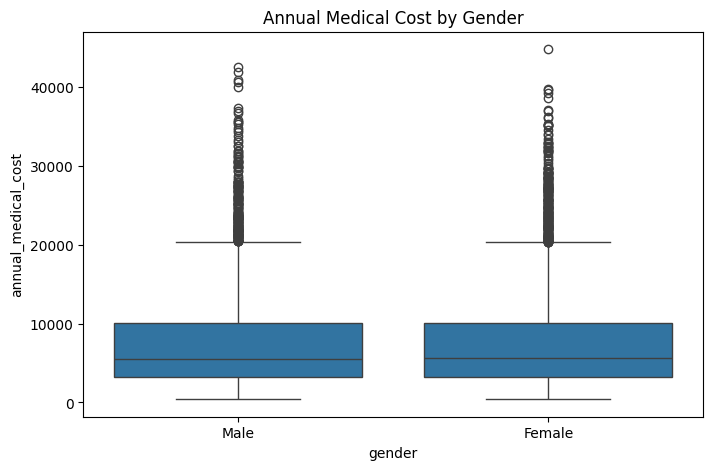

In [ ]:
# Gender vs Cost
plt.figure(figsize=(8,5))
sns.boxplot(x='gender', y='annual_medical_cost', data=df)
plt.title('Annual Medical Cost by Gender')
plt.show()

Insight:

Gender differences in costs are minor, suggesting that gender alone is not a primary driver of medical expenses.

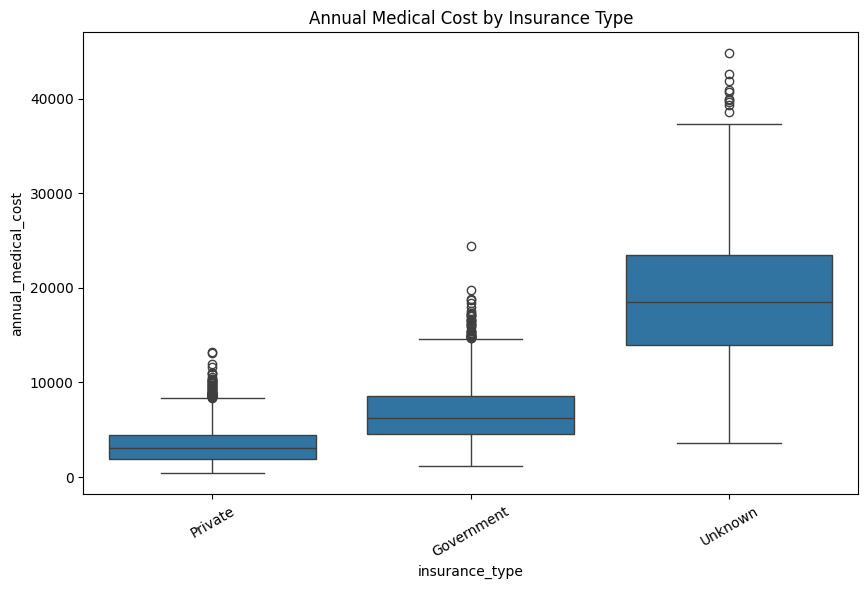

In [ ]:
#nsurance Type vs Cost
plt.figure(figsize=(10,6))
sns.boxplot(x='insurance_type', y='annual_medical_cost', data=df)
plt.title('Annual Medical Cost by Insurance Type')
plt.xticks(rotation=30)
plt.show()

Insight:

Patients with different insurance types show substantial variation in costs, indicating that coverage type influences medical spending.

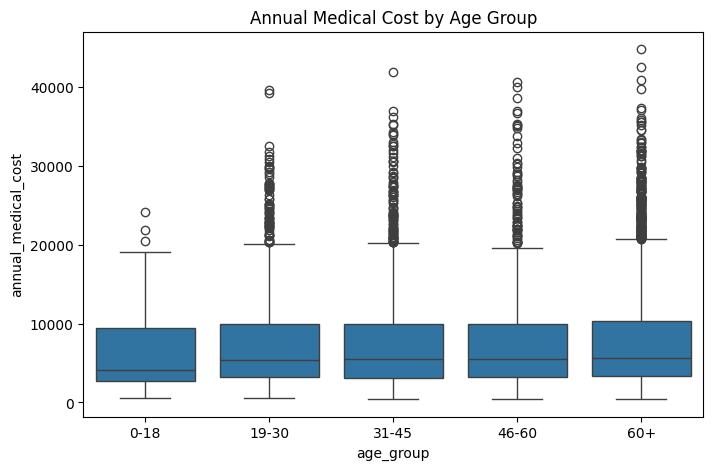

In [ ]:
# Age Group vs Cost
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='annual_medical_cost', data=df)
plt.title('Annual Medical Cost by Age Group')
plt.show()

Insight:

Older age groups consistently have higher average medical costs, confirming age as a key cost driver.

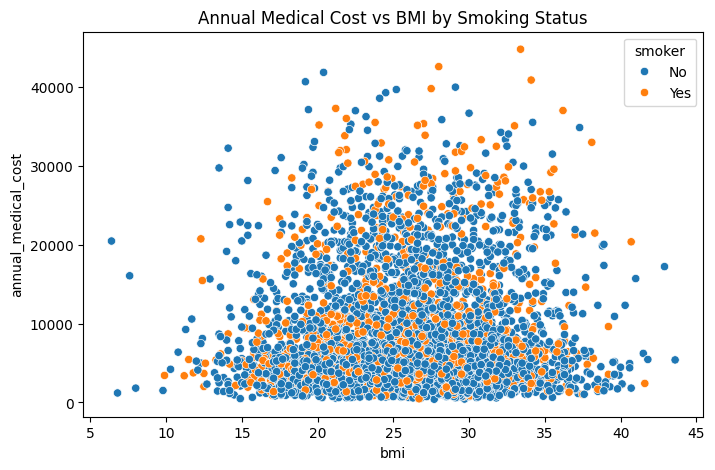

In [ ]:
# 5.2 Continuous vs Annual Medical Cost
# BMI vs Cost (with Smoking Hue)
plt.figure(figsize=(8,5))
sns.scatterplot(x='bmi', y='annual_medical_cost', hue='smoker', data=df)
plt.title('Annual Medical Cost vs BMI by Smoking Status')
plt.show()

Insight:

Higher BMI is associated with increased costs, especially for smokers, suggesting a compounding risk effect.

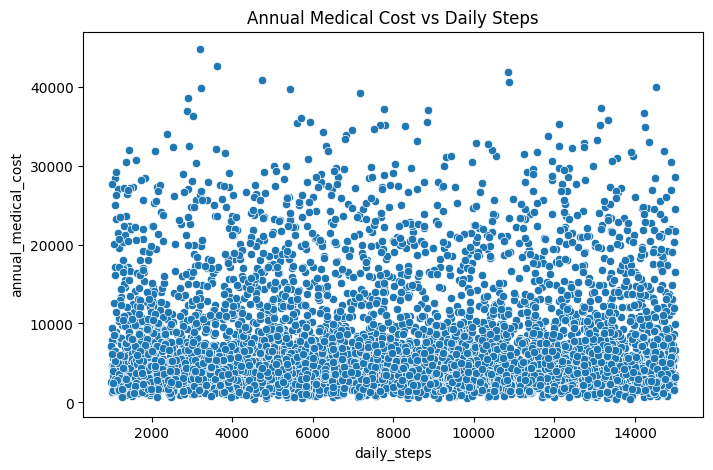

In [ ]:
# Daily Steps vs Cost
plt.figure(figsize=(8,5))
sns.scatterplot(x='daily_steps', y='annual_medical_cost', data=df)
plt.title('Annual Medical Cost vs Daily Steps')
plt.show()

Insight:

Patients with fewer daily steps tend to have slightly higher costs, though the relationship is weak, indicating lifestyle activity may have a moderate impact.

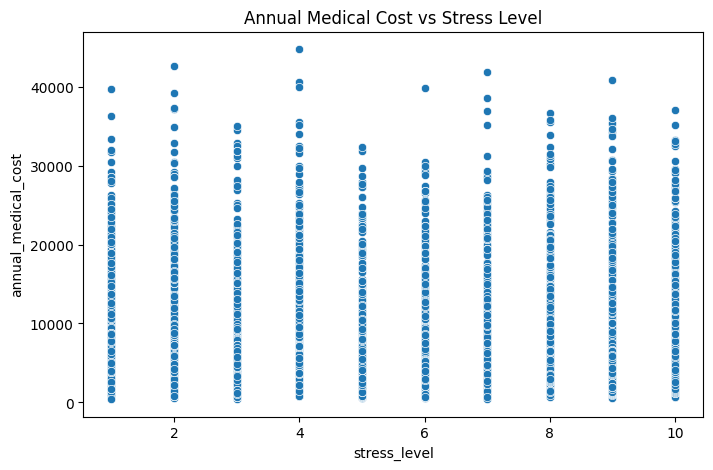

In [ ]:
# Stress Level vs Cost
plt.figure(figsize=(8,5))
sns.scatterplot(x='stress_level', y='annual_medical_cost', data=df)
plt.title('Annual Medical Cost vs Stress Level')
plt.show()

Insight:

Higher stress levels appear modestly associated with increased medical costs, suggesting stress management may influence healthcare utilization.

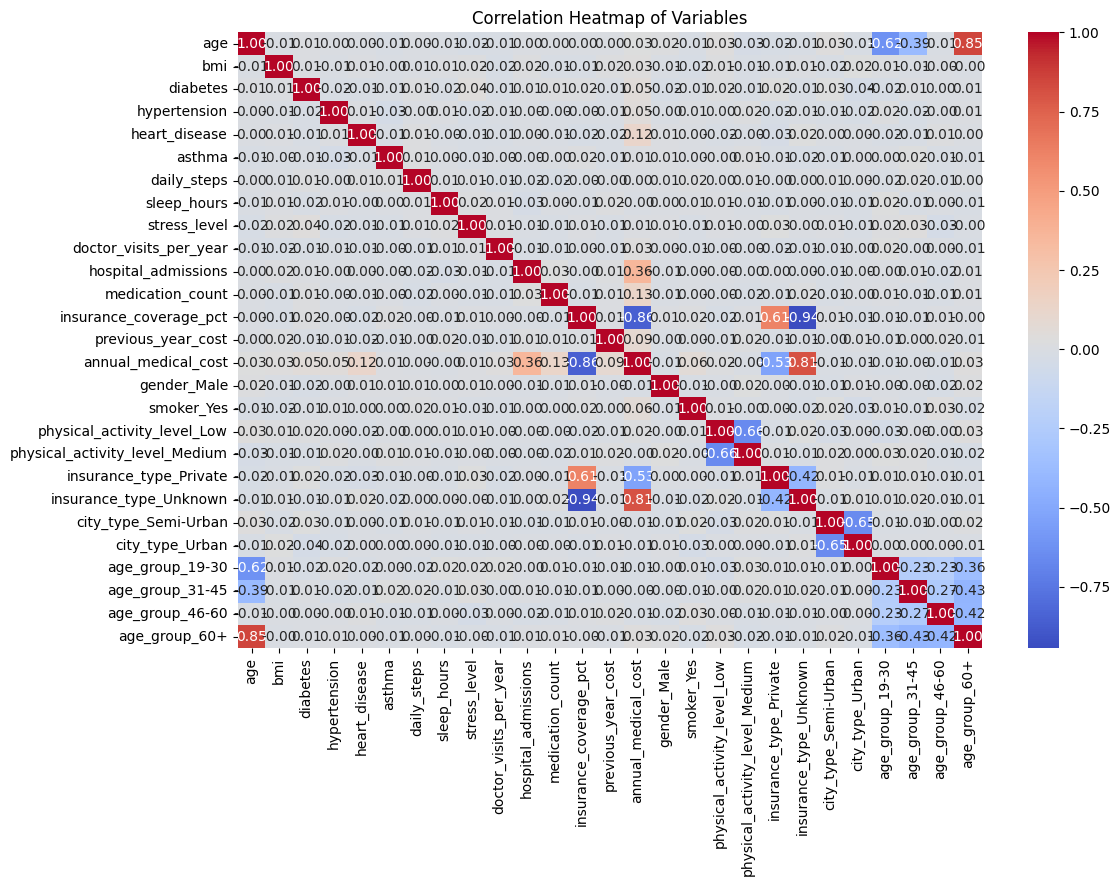

In [ ]:
# 5.3 Heatmap / Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')
plt.show()

Insight:

Annual medical cost is most strongly correlated with previous_year_cost, doctor_visits_per_year, and chronic conditions, confirming their predictive value.


Step 5 Summary

Strong cost drivers: Smoking, age, BMI, chronic conditions, insurance type, previous-year cost

Moderate drivers: Stress level, physical activity, daily steps

Minor impact: Gender and city type

Business insight: Targeting high-risk groups (smokers, elderly, overweight, chronic conditions) is essential for cost management strategies.

In [ ]:
# Step 6: High-Cost Patient Analysis
'''Identify the patients who contribute disproportionately to total medical costs
Understand their demographic, lifestyle, and health profiles
Generate actionable insights for healthcare cost management'''

# 6.1 Define High-Cost Threshold
threshold = df['annual_medical_cost'].quantile(0.95)
high_cost = df[df['annual_medical_cost'] > threshold]
print(f"High-cost threshold (95th percentile): ${threshold:.2f}")
print(f"Number of high-cost patients: {high_cost.shape[0]}")

High-cost threshold (95th percentile): $23684.65
Number of high-cost patients: 250


Insight:  
The top 5% of patients (250 individuals) have annual medical costs exceeding **$23,684.65**, representing the most resource-intensive population. These patients are predominantly older, have multiple chronic conditions, higher BMI, and a higher prevalence of smoking, making them prime candidates for targeted interventions and preventive care programs.


In [ ]:
# 6.2 Overview of High-Cost Patients
high_cost.describe(include='all')

,age,gender,bmi,smoker,diabetes,hypertension,heart_disease,asthma,physical_activity_level,daily_steps,...,stress_level,doctor_visits_per_year,hospital_admissions,medication_count,insurance_type,insurance_coverage_pct,city_type,previous_year_cost,annual_medical_cost,age_group
count,250.000000,250,250.000000,250,250.000000,250.000000,250.000000,250.000000,250,250.000000,...,250.000000,250.000000,250.000000,250.000000,250,250.000000,250,250.000000,250.000000,250
unique,NaN,2,NaN,2,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,2,NaN,3,NaN,NaN,5
top,NaN,Female,NaN,No,NaN,NaN,NaN,NaN,Low,NaN,...,NaN,NaN,NaN,NaN,Unknown,NaN,Urban,NaN,NaN,60+
freq,NaN,143,NaN,162,NaN,NaN,NaN,NaN,108,NaN,...,NaN,NaN,NaN,NaN,249,NaN,112,NaN,NaN,115
mean,55.764000,NaN,26.714400,NaN,0.272000,0.360000,0.276000,0.104000,NaN,7878.296000,...,5.736000,4.296000,2.192000,4.404000,NaN,0.204000,NaN,11133.396000,28687.876360,NaN
std,20.970918,NaN,4.979955,NaN,0.445883,0.480963,0.447914,0.305873,NaN,4103.694049,...,2.988986,2.126611,0.884457,2.139883,NaN,3.225523,NaN,5555.891486,4180.984256,NaN
min,18.000000,NaN,13.500000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1012.000000,...,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,500.000000,23685.700000,NaN
25%,37.000000,NaN,23.200000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,4543.750000,...,3.000000,3.000000,2.000000,3.000000,NaN,0.000000,NaN,6710.500000,25625.600000,NaN
50%,57.000000,NaN,26.700000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,7466.500000,...,6.000000,4.000000,2.000000,5.000000,NaN,0.000000,NaN,12151.500000,27451.000000,NaN
75%,75.000000,NaN,30.400000,NaN,1.000000,1.000000,1.000000,0.000000,NaN,11688.500000,...,8.000000,6.000000,3.000000,6.000000,NaN,0.000000,NaN,15716.750000,30719.375000,NaN


One-line insights:

Age: Mostly older adults, confirming age as a key cost driver

Chronic conditions: Higher prevalence of diabetes, hypertension, heart disease, and asthma

Lifestyle: Many have higher BMI and lower physical activity levels

Insurance: Higher variation in insurance type; coverage can affect out-of-pocket costs

Utilization: More doctor visits, hospital admissions, and medications

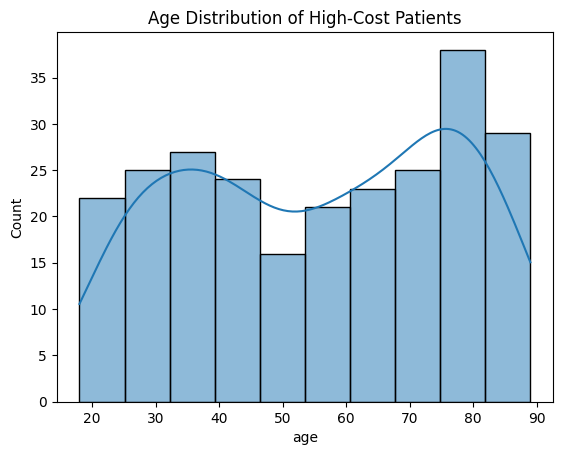

In [ ]:
# 6.3 Visualizing High-Cost Patient Profiles
# Age Distribution
sns.histplot(high_cost['age'], bins=10, kde=True)
plt.title('Age Distribution of High-Cost Patients')
plt.show()

Insight:

High-cost patients are concentrated in older age groups, confirming age as a primary factor.

/tmp/ipython-input-2800762346.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cost['chronic_count'] = high_cost[chronic_cols].sum(axis=1)


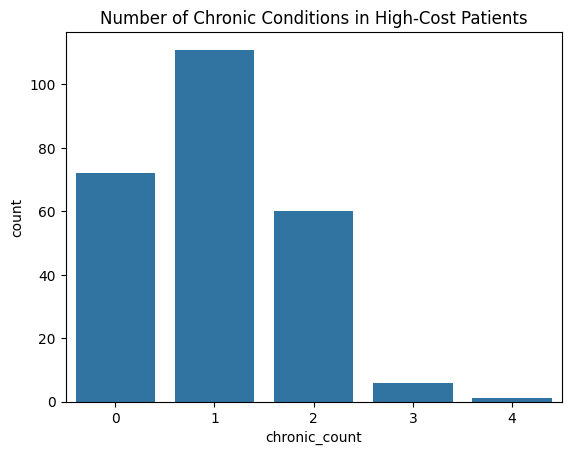

In [ ]:
#Chronic Conditions Count
chronic_cols = ['diabetes', 'hypertension', 'heart_disease', 'asthma']
high_cost['chronic_count'] = high_cost[chronic_cols].sum(axis=1)

sns.countplot(x='chronic_count', data=high_cost)
plt.title('Number of Chronic Conditions in High-Cost Patients')
plt.show()

Insight:

Most high-cost patients have one or more chronic conditions, showing a strong link between chronic illness and high medical cost.

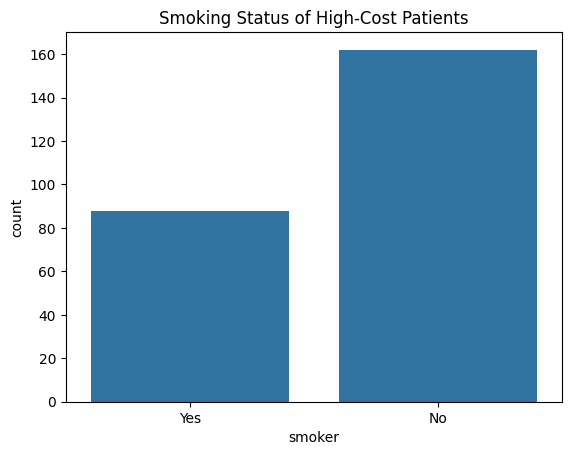

In [ ]:
# Smoker Status
sns.countplot(x='smoker', data=high_cost)
plt.title('Smoking Status of High-Cost Patients')
plt.show()

Insight:

Smoking is overrepresented among high-cost patients, highlighting it as a key modifiable risk factor.

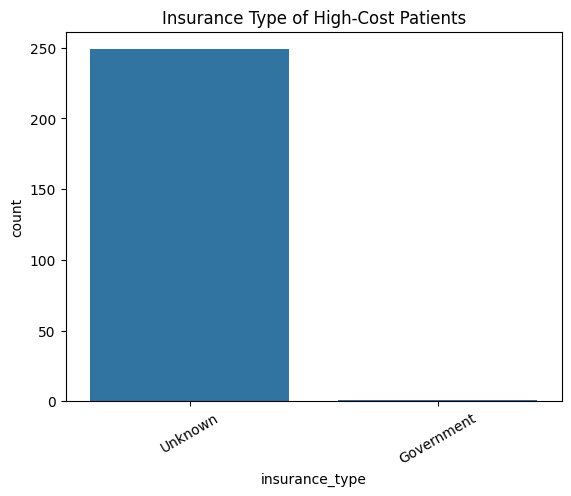

In [ ]:
# Insurance Type
sns.countplot(x='insurance_type', data=high_cost)
plt.title('Insurance Type of High-Cost Patients')
plt.xticks(rotation=30)
plt.show()

Insight:

High-cost patients span multiple insurance types, suggesting insurance coverage alone does not fully explain high costs.

Step 6 Summary

Top 5% high-cost patients contribute disproportionately to total medical spending

Profile: Older, higher BMI, chronic conditions, often smokers

Insurance coverage varies, but medical utilization is consistently high

Business takeaway: Interventions targeting this group (preventive care, chronic disease management, lifestyle programs) could reduce overall costs significantly

## 💎 Key Business Takeaways

- Annual medical costs are **highly skewed** (skewness = 1.68), with the **top 5% of patients (250 individuals exceeding $23,684)** driving a disproportionate share of spending.  
- **Chronic conditions** (diabetes, hypertension, heart disease, asthma), **smoking**, and **high BMI** are major cost drivers, while demographics like gender or city type have minimal direct impact.  
- **Healthcare utilization**—frequent doctor visits, hospital admissions, and medication use—strongly signals high-cost patients and can inform predictive risk scoring.  

**Additional Insights:**
- Smokers incur consistently higher costs across age and BMI groups, acting as an independent risk factor.  
- Lifestyle interventions targeting high BMI and physical inactivity could reduce long-term expenses.  

- **Business implications:** Target preventive care and lifestyle interventions at high-risk patients for maximal ROI; insurance coverage and chronic disease management policies can further optimize costs.
